# Importing the data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged.csv')
df

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                     1.062396          122.90607              31.794921   
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  \
0            51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
1            47.094633  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
2            51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
3            51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
4            51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
...                ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..   
21258        65.764081  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
21259        69.232655  ...  0.0  0.0  0.0  1.0  0.0  0.0   0   0   0   
21260         6.756810  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
21261         6.756810  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   
21262        29.905282  ...  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0   

                     material  
0             Ba0.2La1.8Cu1O4  
1      Ba0.1La1.9Ag0.1Cu0.9O4  
2             Ba0.1La1.9Cu1O4  
3           Ba0.15La1.85Cu1O4  
4             Ba0.3La1.7Cu1O4  
...                       ...  
21258      Tm0.84Lu0.16Fe3Si5  
21259         Tl1Ba2Ca3Cu4O11  
21260              Nb0.8Pd0.2  
21261            Nb0.69Pd0.31  
21262           Fe1Se0.2Te0.8  

[21263 rows x 169 columns]

In [36]:
cols = [i for i in df.columns]
# cols

# Splitting the Data

In [37]:
X = df.drop(['critical_temp', 'material'], axis=1)
# X

In [38]:
y = df.critical_temp.values.reshape(-1,1)
# y

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

r2_training = model_linear.score(X_train,y_train)
r2_testing = model_linear.score(X_test, y_test)

print(f'''
Training R^2 Scores: {round(100*r2_training,2)}%
Testing R^2 Scores:  {round(100*r2_testing,2)}%
''')


Training R^2 Scores: 76.42%
Testing R^2 Scores:  76.31%



# XGBoost

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

regressor = XGBRegressor()

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
score 

0.9254150975686546

# XGBoost with Gridsearch

In [9]:
# from sklearn.model_selection import GridSearchCV

# xgb1 = XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# xgb_grid = GridSearchCV(regressor,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X_train,
#          y_train)
# print('---------------------------------------------------------------------')
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

# TensorFlow Linear Regression Neural Network

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model_and_evaluation(epochs, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mae', 'mse'])

    print(model.summary())


    model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=512,
    validation_split=0.1,
    )
    
    from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    

    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=epochs, 
        batch_size=512,
        validation_data=(X_test, y_test)
    )
    
    pd.DataFrame(history.history).plot(figsize=(15,7))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('metric value')
    # plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

Model Testing

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1729 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1730 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1731 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1732 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1733 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1734 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1735 (Dense)           (None, 1024)           

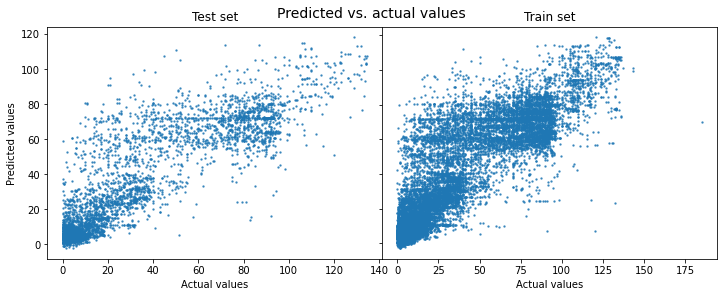

Train on 17010 samples, validate on 4253 samples
Epoch 1/10
17010/17010 [==============================] - 1s 84us/sample - loss: 317.0373 - mae: 12.1816 - mse: 317.0373 - val_loss: 312.5831 - val_mae: 12.1546 - val_mse: 312.5831
Epoch 2/10
17010/17010 [==============================] - 1s 85us/sample - loss: 302.3645 - mae: 11.8851 - mse: 302.3645 - val_loss: 416.2913 - val_mae: 12.9963 - val_mse: 416.2913
Epoch 3/10
17010/17010 [==============================] - 1s 85us/sample - loss: 309.1472 - mae: 11.9349 - mse: 309.1472 - val_loss: 285.7780 - val_mae: 11.5602 - val_mse: 285.7780
Epoch 4/10
17010/17010 [==============================] - 1s 84us/sample - loss: 281.9144 - mae: 11.3521 - mse: 281.9144 - val_loss: 293.0141 - val_mae: 11.5245 - val_mse: 293.0140
Epoch 5/10
17010/17010 [==============================] - 1s 85us/sample - loss: 290.7246 - mae: 11.6548 - mse: 290.7246 - val_loss: 297.7646 - val_mae: 11.7294 - val_mse: 297.7645
Epoch 6/10
17010/17010 [======================

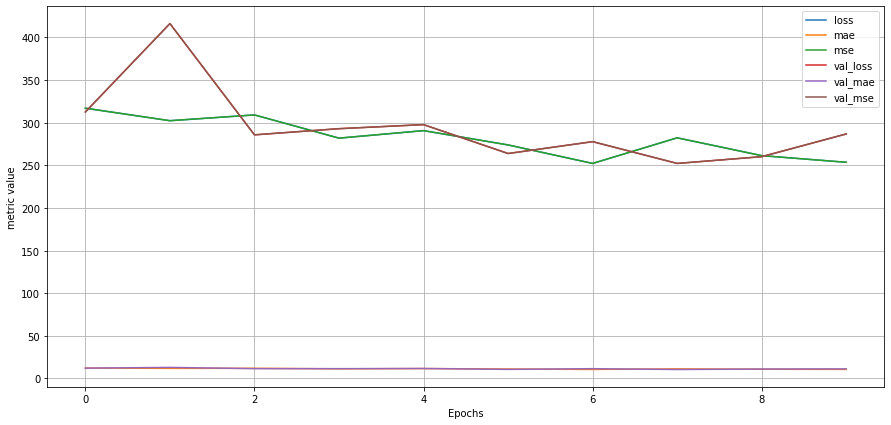

In [88]:
model_and_evaluation(epochs=10, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Model Evaluation

Epochs: 100
Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1740 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1741 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1742 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1743 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1744 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1745 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1746 (Dense)           (None, 1024

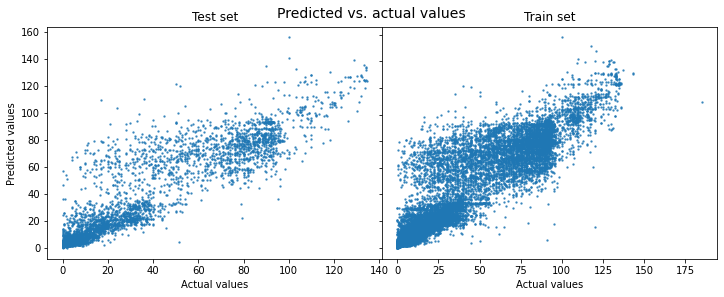

Train on 17010 samples, validate on 4253 samples
Epoch 1/100
17010/17010 [==============================] - 1s 86us/sample - loss: 186.6923 - mae: 8.6893 - mse: 186.6923 - val_loss: 176.3950 - val_mae: 8.4626 - val_mse: 176.3950
Epoch 2/100
17010/17010 [==============================] - 1s 86us/sample - loss: 181.3735 - mae: 8.5315 - mse: 181.3735 - val_loss: 199.2236 - val_mae: 8.7837 - val_mse: 199.2236
Epoch 3/100
17010/17010 [==============================] - 1s 85us/sample - loss: 183.8372 - mae: 8.6573 - mse: 183.8372 - val_loss: 207.3774 - val_mae: 9.4298 - val_mse: 207.3774
Epoch 4/100
17010/17010 [==============================] - 1s 85us/sample - loss: 201.4433 - mae: 9.1558 - mse: 201.4433 - val_loss: 182.4030 - val_mae: 8.7508 - val_mse: 182.4030
Epoch 5/100
17010/17010 [==============================] - 1s 85us/sample - loss: 189.6720 - mae: 8.7846 - mse: 189.6720 - val_loss: 210.2667 - val_mae: 9.3857 - val_mse: 210.2668
Epoch 6/100
17010/17010 [==========================

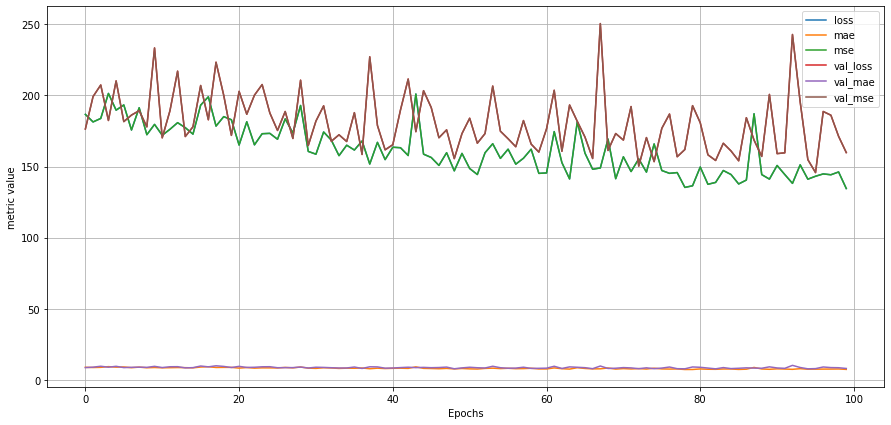

Epochs: 200
Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1751 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1752 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1753 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1754 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1755 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1756 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1757 (Dense)           (None, 1024

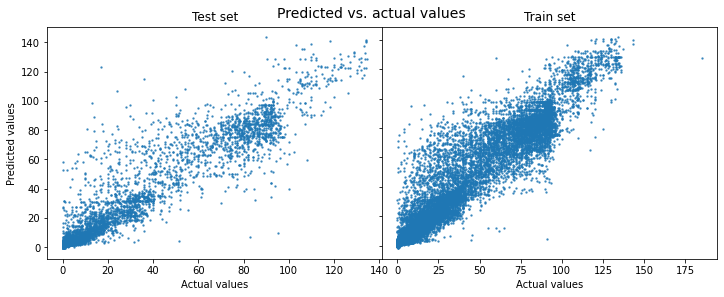

Train on 17010 samples, validate on 4253 samples
Epoch 1/200
17010/17010 [==============================] - 1s 84us/sample - loss: 138.3330 - mae: 7.3286 - mse: 138.3330 - val_loss: 167.0280 - val_mae: 8.3342 - val_mse: 167.0280
Epoch 2/200
17010/17010 [==============================] - 1s 83us/sample - loss: 147.6470 - mae: 7.6348 - mse: 147.6470 - val_loss: 159.9391 - val_mae: 7.7317 - val_mse: 159.9391
Epoch 3/200
17010/17010 [==============================] - 1s 83us/sample - loss: 147.1843 - mae: 7.6397 - mse: 147.1843 - val_loss: 245.3091 - val_mae: 9.3950 - val_mse: 245.3091
Epoch 4/200
17010/17010 [==============================] - 1s 84us/sample - loss: 159.8722 - mae: 7.9390 - mse: 159.8722 - val_loss: 152.2472 - val_mae: 7.8176 - val_mse: 152.2472
Epoch 5/200
17010/17010 [==============================] - 1s 84us/sample - loss: 128.7996 - mae: 7.0986 - mse: 128.7996 - val_loss: 146.3083 - val_mae: 7.7518 - val_mse: 146.3083
Epoch 6/200
17010/17010 [==========================

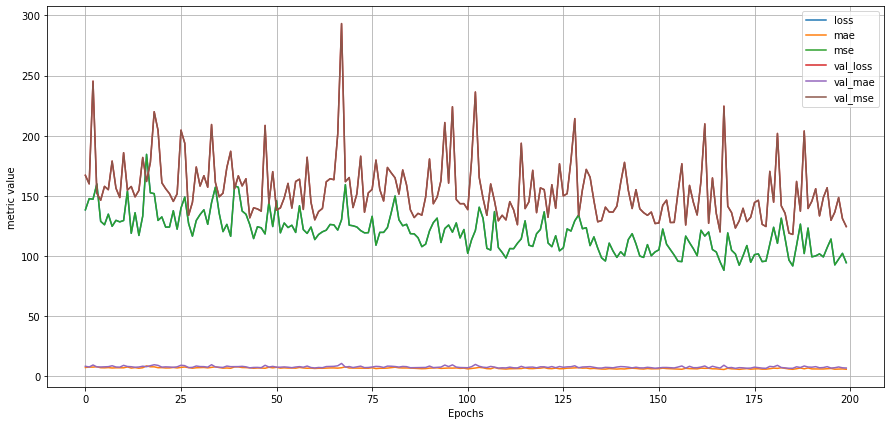

Epochs: 300
Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1762 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1763 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1764 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1765 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1766 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1767 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1768 (Dense)           (None, 1024

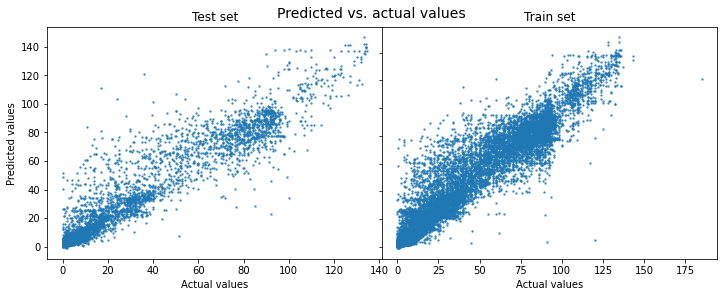

Train on 17010 samples, validate on 4253 samples
Epoch 1/300
17010/17010 [==============================] - 1s 83us/sample - loss: 110.2894 - mae: 6.5015 - mse: 110.2894 - val_loss: 139.3648 - val_mae: 7.6358 - val_mse: 139.3648
Epoch 2/300
17010/17010 [==============================] - 1s 83us/sample - loss: 135.2320 - mae: 7.1959 - mse: 135.2320 - val_loss: 152.3762 - val_mae: 7.8010 - val_mse: 152.3763
Epoch 3/300
17010/17010 [==============================] - 1s 84us/sample - loss: 116.2497 - mae: 6.7083 - mse: 116.2497 - val_loss: 132.8012 - val_mae: 7.2360 - val_mse: 132.8011
Epoch 4/300
17010/17010 [==============================] - 1s 84us/sample - loss: 120.1414 - mae: 6.7639 - mse: 120.1414 - val_loss: 157.9374 - val_mae: 8.1267 - val_mse: 157.9373
Epoch 5/300
17010/17010 [==============================] - 1s 83us/sample - loss: 113.3854 - mae: 6.6083 - mse: 113.3854 - val_loss: 171.3562 - val_mae: 8.1993 - val_mse: 171.3562
Epoch 6/300
17010/17010 [==========================

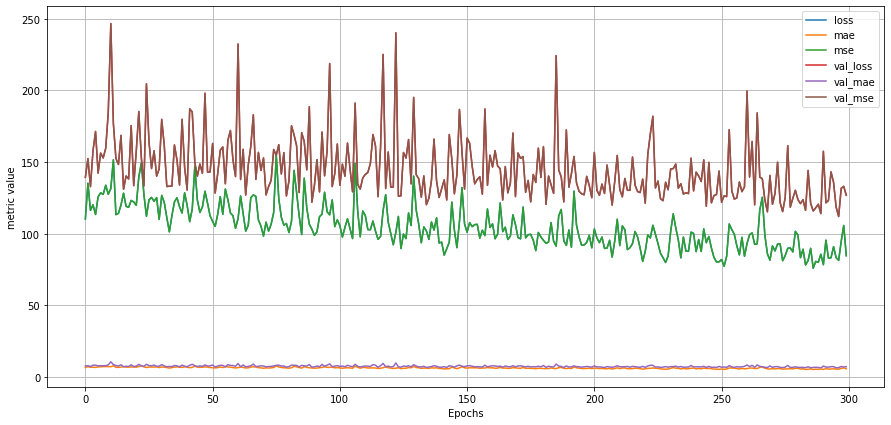

Epochs: 400
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1773 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1774 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1775 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1776 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1777 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1778 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1779 (Dense)           (None, 1024

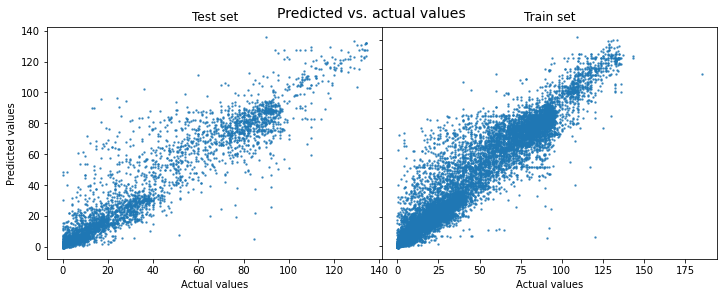

Train on 17010 samples, validate on 4253 samples
Epoch 1/400
17010/17010 [==============================] - 1s 83us/sample - loss: 106.2972 - mae: 6.2938 - mse: 106.2972 - val_loss: 188.1258 - val_mae: 8.0592 - val_mse: 188.1258
Epoch 2/400
17010/17010 [==============================] - 1s 84us/sample - loss: 146.5108 - mae: 7.4925 - mse: 146.5108 - val_loss: 166.7484 - val_mae: 8.5757 - val_mse: 166.7484
Epoch 3/400
17010/17010 [==============================] - 1s 82us/sample - loss: 118.3584 - mae: 6.7343 - mse: 118.3584 - val_loss: 138.1320 - val_mae: 7.2331 - val_mse: 138.1320
Epoch 4/400
17010/17010 [==============================] - 1s 82us/sample - loss: 95.4161 - mae: 5.9780 - mse: 95.4161 - val_loss: 154.8215 - val_mae: 7.8417 - val_mse: 154.8215
Epoch 5/400
17010/17010 [==============================] - 1s 82us/sample - loss: 108.7976 - mae: 6.3881 - mse: 108.7976 - val_loss: 142.1460 - val_mae: 7.3685 - val_mse: 142.1460
Epoch 6/400
17010/17010 [============================

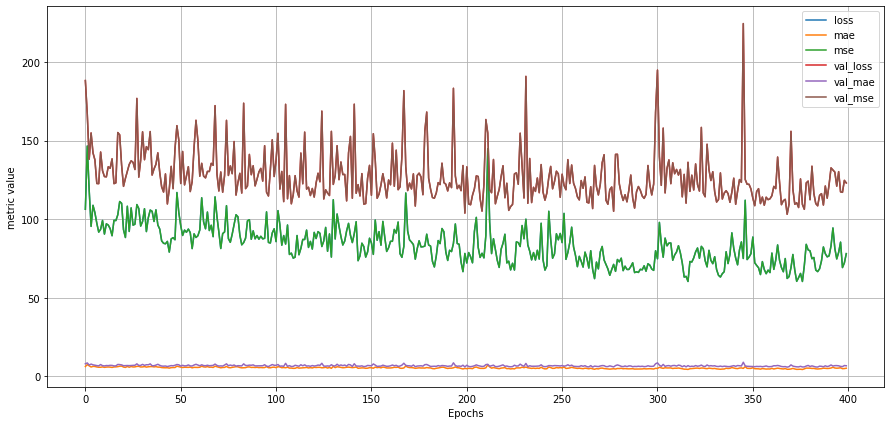

Epochs: 500
Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1784 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1785 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1786 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1787 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1788 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1789 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1790 (Dense)           (None, 1024

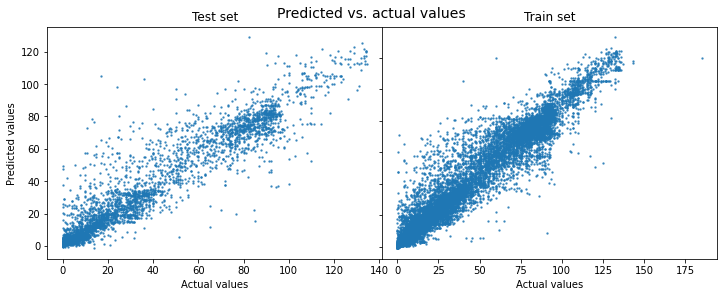

Train on 17010 samples, validate on 4253 samples
Epoch 1/500
17010/17010 [==============================] - 1s 82us/sample - loss: 82.4680 - mae: 5.3827 - mse: 82.4680 - val_loss: 124.9609 - val_mae: 6.7405 - val_mse: 124.9609
Epoch 2/500
17010/17010 [==============================] - 1s 82us/sample - loss: 92.7587 - mae: 5.7626 - mse: 92.7587 - val_loss: 153.2557 - val_mae: 7.4764 - val_mse: 153.2557
Epoch 3/500
17010/17010 [==============================] - 1s 81us/sample - loss: 101.4871 - mae: 6.0689 - mse: 101.4871 - val_loss: 127.4891 - val_mae: 6.9467 - val_mse: 127.4891
Epoch 4/500
17010/17010 [==============================] - 1s 82us/sample - loss: 91.8624 - mae: 5.7930 - mse: 91.8624 - val_loss: 123.8481 - val_mae: 6.7415 - val_mse: 123.8481
Epoch 5/500
17010/17010 [==============================] - 1s 81us/sample - loss: 93.1663 - mae: 5.8861 - mse: 93.1663 - val_loss: 134.8134 - val_mae: 7.1939 - val_mse: 134.8134
Epoch 6/500
17010/17010 [==============================] - 

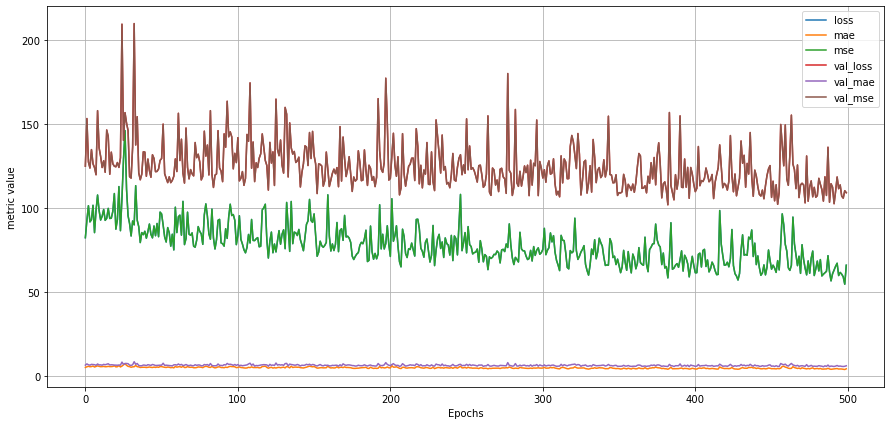

Epochs: 600
Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1795 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1796 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1797 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1798 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1799 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1800 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1801 (Dense)           (None, 1024

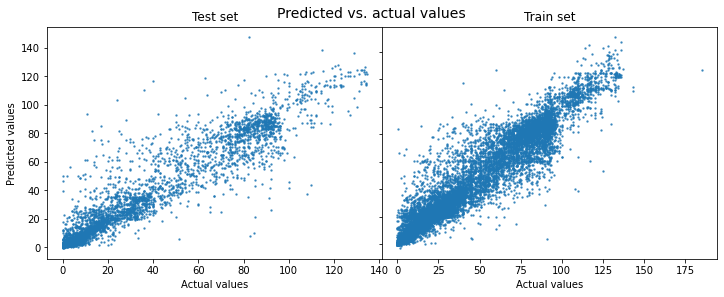

Train on 17010 samples, validate on 4253 samples
Epoch 1/600
17010/17010 [==============================] - 1s 82us/sample - loss: 88.8436 - mae: 5.5628 - mse: 88.8436 - val_loss: 118.6174 - val_mae: 6.7855 - val_mse: 118.6174
Epoch 2/600
17010/17010 [==============================] - 1s 81us/sample - loss: 89.5136 - mae: 5.6081 - mse: 89.5136 - val_loss: 123.3616 - val_mae: 6.8984 - val_mse: 123.3616
Epoch 3/600
17010/17010 [==============================] - 1s 81us/sample - loss: 97.6975 - mae: 5.9425 - mse: 97.6975 - val_loss: 120.5223 - val_mae: 6.7920 - val_mse: 120.5223
Epoch 4/600
17010/17010 [==============================] - 1s 82us/sample - loss: 79.6529 - mae: 5.4175 - mse: 79.6529 - val_loss: 132.6415 - val_mae: 7.3536 - val_mse: 132.6415
Epoch 5/600
17010/17010 [==============================] - 1s 81us/sample - loss: 95.2114 - mae: 5.8450 - mse: 95.2114 - val_loss: 148.3990 - val_mae: 7.7877 - val_mse: 148.3990
Epoch 6/600
17010/17010 [==============================] - 1s

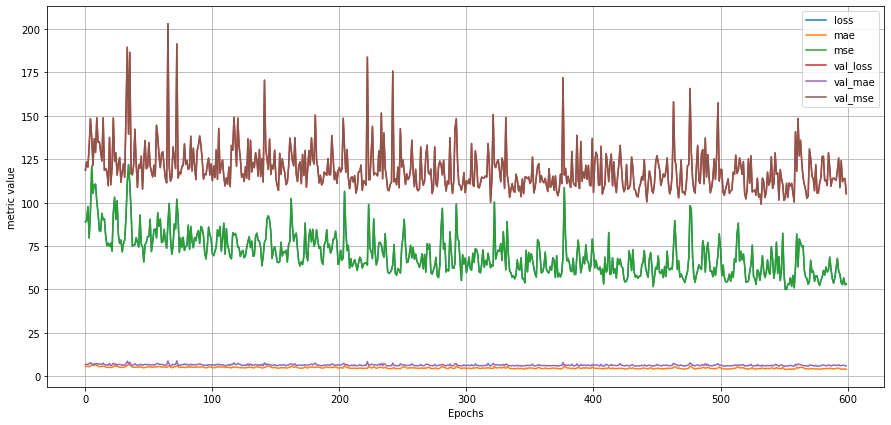

Epochs: 700
Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1806 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1807 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1808 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1809 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1810 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1811 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1812 (Dense)           (None, 1024

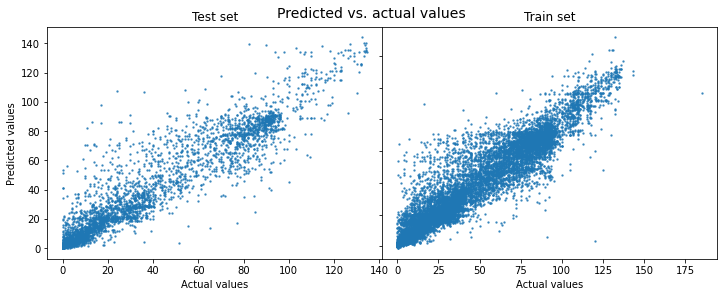

Train on 17010 samples, validate on 4253 samples
Epoch 1/700
17010/17010 [==============================] - 1s 81us/sample - loss: 98.7188 - mae: 5.8947 - mse: 98.7188 - val_loss: 138.0756 - val_mae: 6.8728 - val_mse: 138.0756
Epoch 2/700
17010/17010 [==============================] - 1s 81us/sample - loss: 96.0452 - mae: 5.8396 - mse: 96.0452 - val_loss: 134.7698 - val_mae: 6.9244 - val_mse: 134.7698
Epoch 3/700
17010/17010 [==============================] - 1s 81us/sample - loss: 96.6431 - mae: 5.8945 - mse: 96.6431 - val_loss: 141.9923 - val_mae: 7.0003 - val_mse: 141.9923
Epoch 4/700
17010/17010 [==============================] - 1s 81us/sample - loss: 89.3112 - mae: 5.6666 - mse: 89.3112 - val_loss: 123.0032 - val_mae: 6.9492 - val_mse: 123.0032
Epoch 5/700
17010/17010 [==============================] - 1s 82us/sample - loss: 78.1185 - mae: 5.3132 - mse: 78.1185 - val_loss: 129.9254 - val_mae: 6.7160 - val_mse: 129.9254
Epoch 6/700
17010/17010 [==============================] - 1s

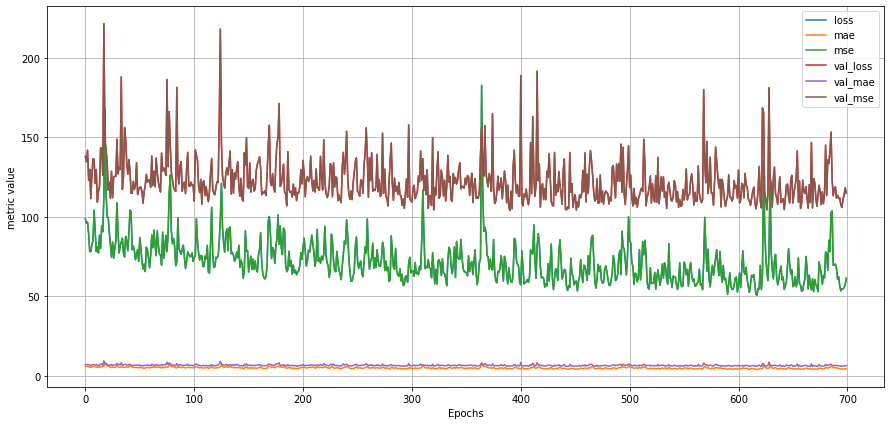

Epochs: 800
Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1817 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1818 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1819 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1820 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1821 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1822 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1823 (Dense)           (None, 1024

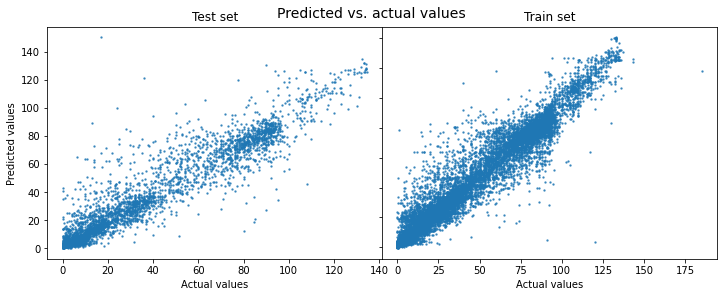

Train on 17010 samples, validate on 4253 samples
Epoch 1/800
17010/17010 [==============================] - 1s 81us/sample - loss: 91.4246 - mae: 5.6530 - mse: 91.4246 - val_loss: 130.2110 - val_mae: 6.7963 - val_mse: 130.2110
Epoch 2/800
17010/17010 [==============================] - 1s 81us/sample - loss: 71.5406 - mae: 5.0794 - mse: 71.5406 - val_loss: 131.0175 - val_mae: 6.8770 - val_mse: 131.0175
Epoch 3/800
17010/17010 [==============================] - 1s 81us/sample - loss: 75.6912 - mae: 5.1847 - mse: 75.6912 - val_loss: 119.2967 - val_mae: 6.4564 - val_mse: 119.2967
Epoch 4/800
17010/17010 [==============================] - 1s 81us/sample - loss: 73.2314 - mae: 5.0472 - mse: 73.2314 - val_loss: 130.8091 - val_mae: 6.5951 - val_mse: 130.8091
Epoch 5/800
17010/17010 [==============================] - 1s 81us/sample - loss: 78.2349 - mae: 5.1949 - mse: 78.2349 - val_loss: 141.9270 - val_mae: 6.9893 - val_mse: 141.9270
Epoch 6/800
17010/17010 [==============================] - 1s

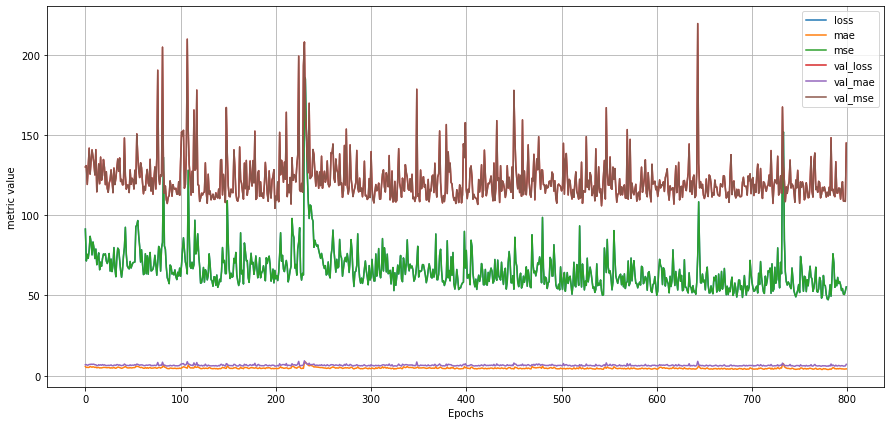

Epochs: 900
Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1828 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1829 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1830 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1831 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1832 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1833 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1834 (Dense)           (None, 1024

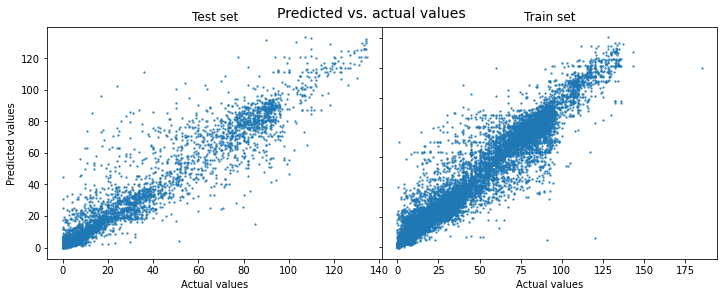

Train on 17010 samples, validate on 4253 samples
Epoch 1/900
17010/17010 [==============================] - 1s 82us/sample - loss: 85.3142 - mae: 5.3609 - mse: 85.3142 - val_loss: 122.3078 - val_mae: 6.6906 - val_mse: 122.3078
Epoch 2/900
17010/17010 [==============================] - 1s 81us/sample - loss: 79.2526 - mae: 5.2165 - mse: 79.2526 - val_loss: 138.7632 - val_mae: 7.4334 - val_mse: 138.7632
Epoch 3/900
17010/17010 [==============================] - 1s 82us/sample - loss: 88.7717 - mae: 5.5635 - mse: 88.7717 - val_loss: 176.2905 - val_mae: 8.6443 - val_mse: 176.2905
Epoch 4/900
17010/17010 [==============================] - 1s 81us/sample - loss: 94.9774 - mae: 5.8040 - mse: 94.9774 - val_loss: 118.1290 - val_mae: 6.4192 - val_mse: 118.1291
Epoch 5/900
17010/17010 [==============================] - 1s 82us/sample - loss: 79.5024 - mae: 5.3166 - mse: 79.5024 - val_loss: 114.4284 - val_mae: 6.4897 - val_mse: 114.4284
Epoch 6/900
17010/17010 [==============================] - 1s

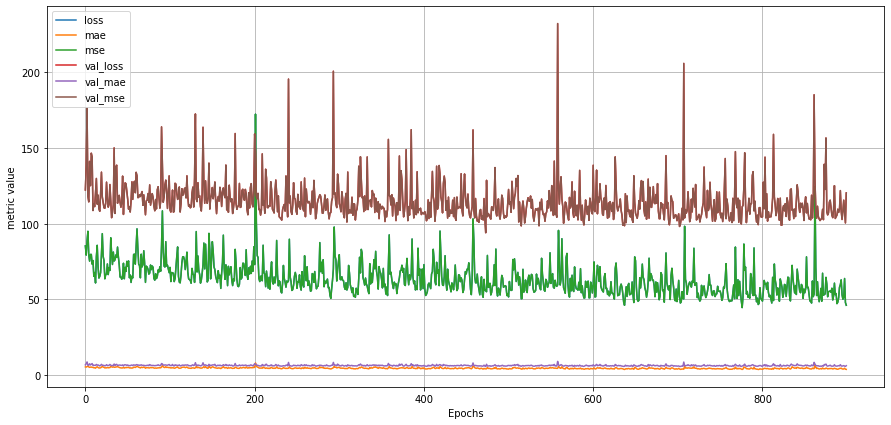

Epochs: 1000
Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1839 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1840 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1841 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1842 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1843 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1844 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1845 (Dense)           (None, 102

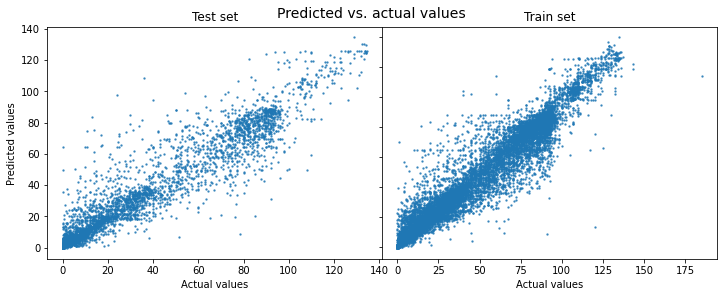

Train on 17010 samples, validate on 4253 samples
Epoch 1/1000
17010/17010 [==============================] - 1s 82us/sample - loss: 68.6966 - mae: 4.6718 - mse: 68.6966 - val_loss: 121.0205 - val_mae: 6.3159 - val_mse: 121.0205
Epoch 2/1000
17010/17010 [==============================] - 1s 81us/sample - loss: 67.7531 - mae: 4.7350 - mse: 67.7531 - val_loss: 114.0531 - val_mae: 6.4170 - val_mse: 114.0531
Epoch 3/1000
17010/17010 [==============================] - 1s 81us/sample - loss: 71.9240 - mae: 4.9090 - mse: 71.9240 - val_loss: 121.6000 - val_mae: 6.8743 - val_mse: 121.6000
Epoch 4/1000
17010/17010 [==============================] - 1s 81us/sample - loss: 74.5698 - mae: 5.1803 - mse: 74.5698 - val_loss: 130.9744 - val_mae: 6.8620 - val_mse: 130.9744
Epoch 5/1000
17010/17010 [==============================] - 1s 81us/sample - loss: 68.7397 - mae: 4.9594 - mse: 68.7397 - val_loss: 126.9957 - val_mae: 6.6364 - val_mse: 126.9957
Epoch 6/1000
17010/17010 [==============================

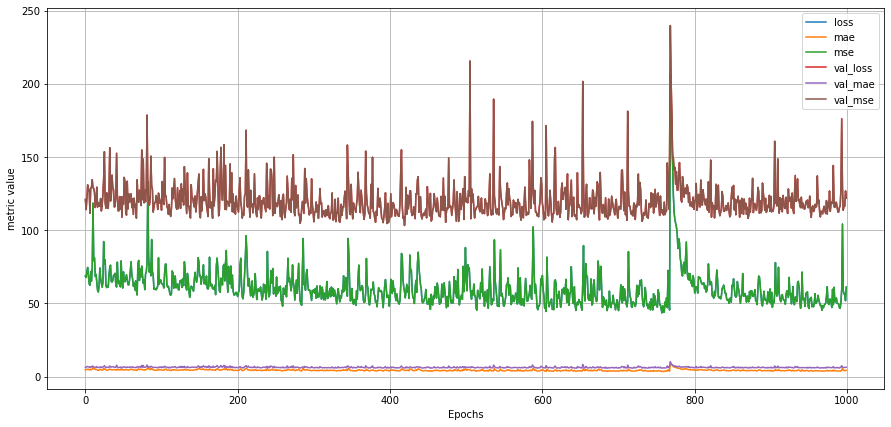

Epochs: 1100
Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1850 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1851 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1852 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1853 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1854 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1855 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1856 (Dense)           (None, 102

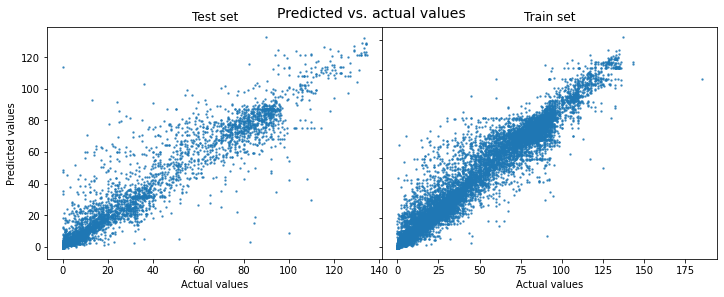

Train on 17010 samples, validate on 4253 samples
Epoch 1/1100
17010/17010 [==============================] - 1s 81us/sample - loss: 64.2788 - mae: 4.5634 - mse: 64.2788 - val_loss: 118.3868 - val_mae: 6.1179 - val_mse: 118.3868
Epoch 2/1100
17010/17010 [==============================] - 1s 81us/sample - loss: 70.7377 - mae: 4.9013 - mse: 70.7377 - val_loss: 130.7780 - val_mae: 6.8355 - val_mse: 130.7780
Epoch 3/1100
17010/17010 [==============================] - 1s 81us/sample - loss: 80.5609 - mae: 5.2205 - mse: 80.5609 - val_loss: 138.4302 - val_mae: 7.3566 - val_mse: 138.4302
Epoch 4/1100
17010/17010 [==============================] - 1s 81us/sample - loss: 88.9095 - mae: 5.5265 - mse: 88.9095 - val_loss: 134.7850 - val_mae: 6.9482 - val_mse: 134.7850
Epoch 5/1100
17010/17010 [==============================] - 1s 81us/sample - loss: 89.5165 - mae: 5.6147 - mse: 89.5165 - val_loss: 128.3742 - val_mae: 6.8157 - val_mse: 128.3743
Epoch 6/1100
17010/17010 [==============================

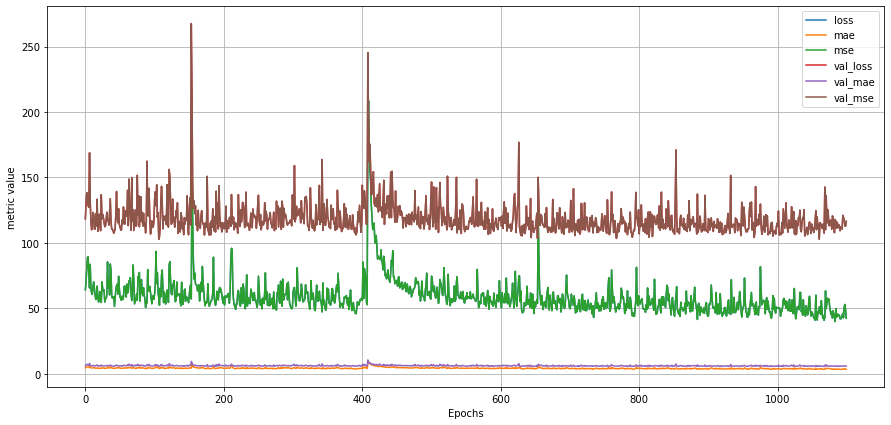

Epochs: 1200
Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1861 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1862 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1863 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1864 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1865 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1866 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1867 (Dense)           (None, 102

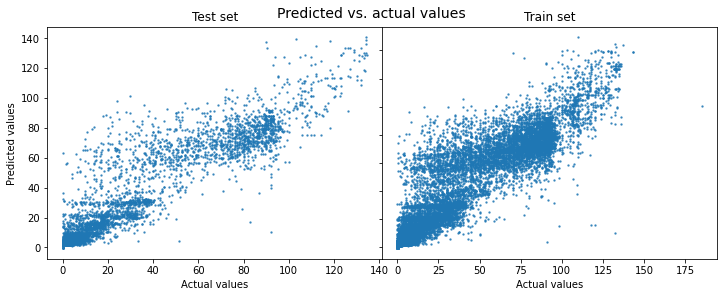

Train on 17010 samples, validate on 4253 samples
Epoch 1/1200
17010/17010 [==============================] - 1s 81us/sample - loss: 179.8973 - mae: 8.5146 - mse: 179.8973 - val_loss: 173.7144 - val_mae: 8.3391 - val_mse: 173.7144
Epoch 2/1200
17010/17010 [==============================] - 1s 81us/sample - loss: 174.9628 - mae: 8.3392 - mse: 174.9628 - val_loss: 183.1755 - val_mae: 9.0211 - val_mse: 183.1755
Epoch 3/1200
17010/17010 [==============================] - 1s 81us/sample - loss: 174.3329 - mae: 8.2970 - mse: 174.3330 - val_loss: 180.4026 - val_mae: 8.6603 - val_mse: 180.4026
Epoch 4/1200
17010/17010 [==============================] - 1s 81us/sample - loss: 166.9284 - mae: 8.0722 - mse: 166.9284 - val_loss: 159.3844 - val_mae: 8.1031 - val_mse: 159.3844
Epoch 5/1200
17010/17010 [==============================] - 1s 80us/sample - loss: 157.8953 - mae: 7.8024 - mse: 157.8953 - val_loss: 190.3934 - val_mae: 9.0278 - val_mse: 190.3935
Epoch 6/1200
17010/17010 [====================

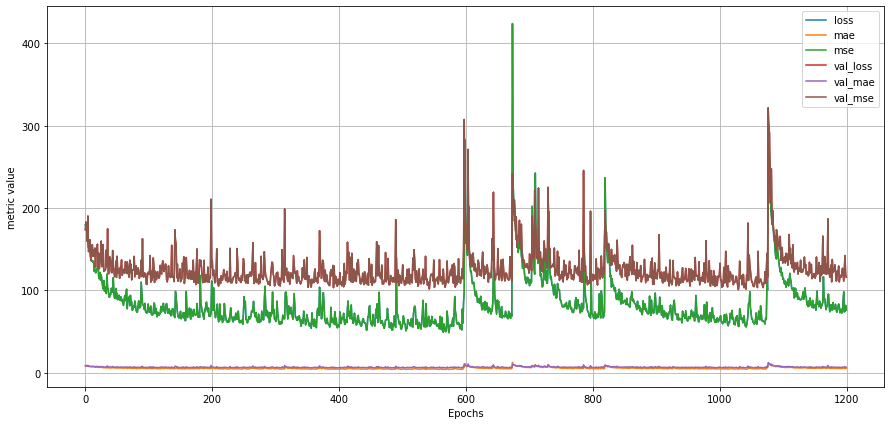

Epochs: 1300
Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1872 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1873 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1874 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1875 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1876 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1877 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1878 (Dense)           (None, 102

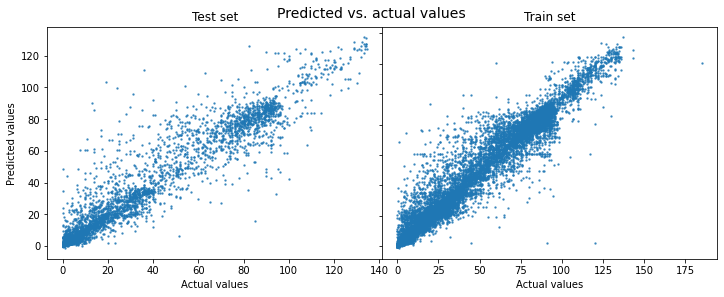

Train on 17010 samples, validate on 4253 samples
Epoch 1/1300
17010/17010 [==============================] - 1s 82us/sample - loss: 63.9086 - mae: 4.4774 - mse: 63.9086 - val_loss: 110.6365 - val_mae: 6.0812 - val_mse: 110.6365
Epoch 2/1300
17010/17010 [==============================] - 1s 81us/sample - loss: 60.7860 - mae: 4.5279 - mse: 60.7860 - val_loss: 104.0441 - val_mae: 5.8952 - val_mse: 104.0441
Epoch 3/1300
17010/17010 [==============================] - 1s 81us/sample - loss: 64.3873 - mae: 4.7163 - mse: 64.3873 - val_loss: 117.8692 - val_mae: 6.5562 - val_mse: 117.8692
Epoch 4/1300
17010/17010 [==============================] - 1s 81us/sample - loss: 67.6331 - mae: 4.7883 - mse: 67.6331 - val_loss: 139.0779 - val_mae: 7.1552 - val_mse: 139.0779
Epoch 5/1300
17010/17010 [==============================] - 1s 82us/sample - loss: 64.6102 - mae: 4.6731 - mse: 64.6102 - val_loss: 108.3056 - val_mae: 6.0751 - val_mse: 108.3056
Epoch 6/1300
17010/17010 [==============================

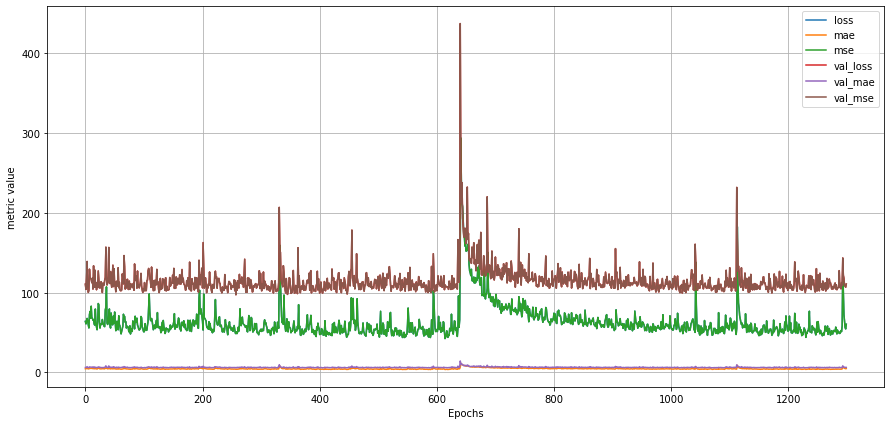

Epochs: 1400
Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1883 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1884 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1885 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1886 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1887 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1888 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1889 (Dense)           (None, 102

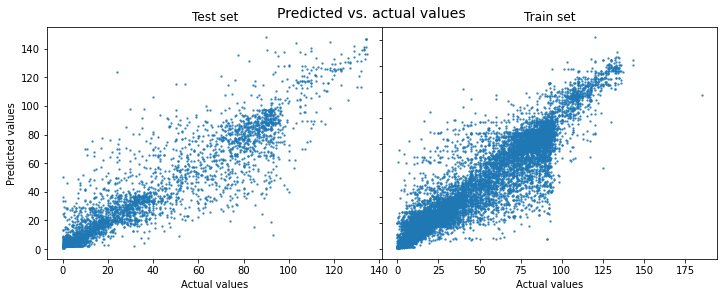

Train on 17010 samples, validate on 4253 samples
Epoch 1/1400
17010/17010 [==============================] - 1s 81us/sample - loss: 84.2374 - mae: 5.3629 - mse: 84.2374 - val_loss: 132.2121 - val_mae: 6.7813 - val_mse: 132.2121
Epoch 2/1400
17010/17010 [==============================] - 1s 81us/sample - loss: 72.9298 - mae: 4.9700 - mse: 72.9298 - val_loss: 121.5818 - val_mae: 6.2791 - val_mse: 121.5818
Epoch 3/1400
17010/17010 [==============================] - 1s 81us/sample - loss: 68.4218 - mae: 4.7605 - mse: 68.4218 - val_loss: 122.5425 - val_mae: 6.3702 - val_mse: 122.5425
Epoch 4/1400
17010/17010 [==============================] - 1s 81us/sample - loss: 63.9314 - mae: 4.5939 - mse: 63.9314 - val_loss: 113.6724 - val_mae: 6.1779 - val_mse: 113.6724
Epoch 5/1400
17010/17010 [==============================] - 1s 81us/sample - loss: 78.8286 - mae: 5.1361 - mse: 78.8286 - val_loss: 140.2793 - val_mae: 6.8048 - val_mse: 140.2793
Epoch 6/1400
17010/17010 [==============================

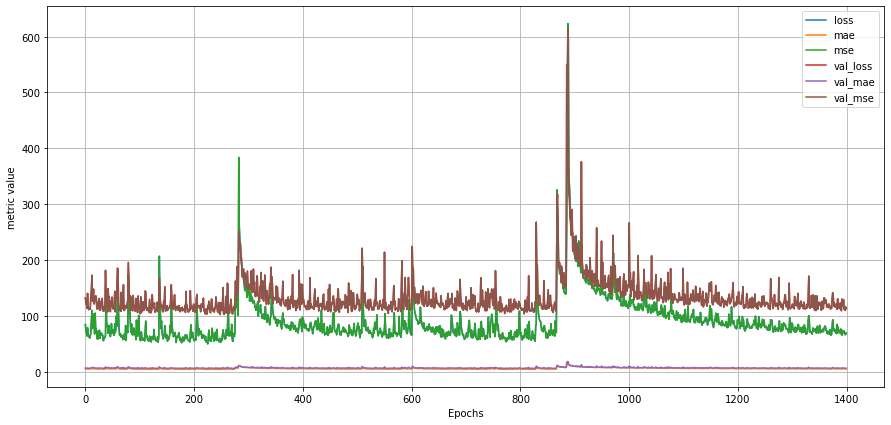

Epochs: 1500
Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1894 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1895 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1896 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1897 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1898 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1899 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1900 (Dense)           (None, 102

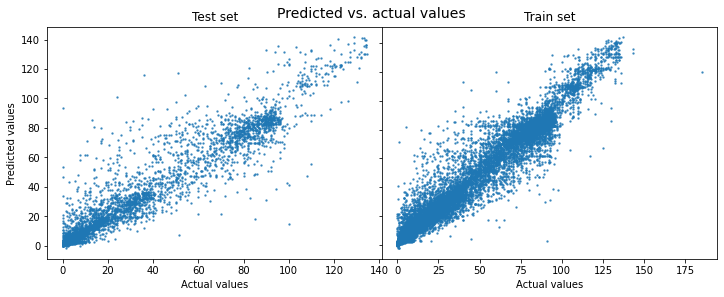

Train on 17010 samples, validate on 4253 samples
Epoch 1/1500
17010/17010 [==============================] - 1s 82us/sample - loss: 61.5271 - mae: 4.4662 - mse: 61.5271 - val_loss: 144.7235 - val_mae: 7.3759 - val_mse: 144.7235
Epoch 2/1500
17010/17010 [==============================] - 1s 81us/sample - loss: 70.1849 - mae: 4.8255 - mse: 70.1849 - val_loss: 117.7004 - val_mae: 6.2052 - val_mse: 117.7004
Epoch 3/1500
17010/17010 [==============================] - 1s 81us/sample - loss: 71.4060 - mae: 4.9406 - mse: 71.4060 - val_loss: 119.9395 - val_mae: 6.5048 - val_mse: 119.9395
Epoch 4/1500
17010/17010 [==============================] - 1s 81us/sample - loss: 67.5138 - mae: 4.7615 - mse: 67.5138 - val_loss: 114.8740 - val_mae: 6.1326 - val_mse: 114.8739
Epoch 5/1500
17010/17010 [==============================] - 1s 81us/sample - loss: 59.9746 - mae: 4.5053 - mse: 59.9746 - val_loss: 116.6773 - val_mae: 6.1962 - val_mse: 116.6773
Epoch 6/1500
17010/17010 [==============================

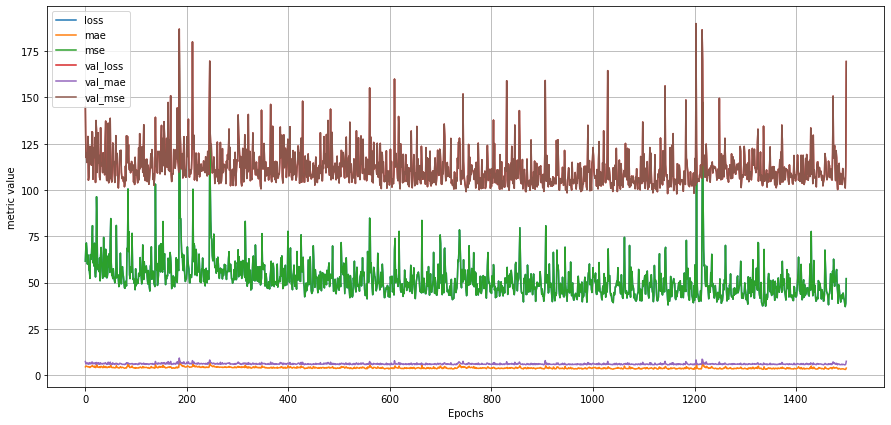

Epochs: 1600
Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1905 (Dense)           (None, 128)               21504     
_________________________________________________________________
dense_1906 (Dense)           (None, 256)               33024     
_________________________________________________________________
dense_1907 (Dense)           (None, 512)               131584    
_________________________________________________________________
dense_1908 (Dense)           (None, 512)               262656    
_________________________________________________________________
dense_1909 (Dense)           (None, 1024)              525312    
_________________________________________________________________
dense_1910 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dense_1911 (Dense)           (None, 102

KeyboardInterrupt: 

In [89]:
for i in np.arange(100, 2100, 100):
    print(f"Epochs: {i}")
    model_and_evaluation(epochs=i, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Optimising with TensorFlow

In [20]:
from tensorflow import keras

In [51]:
def build_model(n_hidden=10, n_neurons=300, learning_rate=3e-3, input_shape=(X_train.shape[1],)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [52]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [58]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]
             )

Train on 17010 samples, validate on 4253 samples
Epoch 1/100
17010/17010 [==============================] - 4s 224us/sample - loss: 2221.9089 - val_loss: 415.3903
Epoch 2/100
17010/17010 [==============================] - 3s 182us/sample - loss: 371.0852 - val_loss: 359.6949
Epoch 3/100
17010/17010 [==============================] - 3s 186us/sample - loss: 345.3933 - val_loss: 435.0678
Epoch 4/100
17010/17010 [==============================] - 3s 171us/sample - loss: 326.6795 - val_loss: 349.5377
Epoch 5/100
17010/17010 [==============================] - 3s 180us/sample - loss: 323.2804 - val_loss: 323.5485
Epoch 6/100
17010/17010 [==============================] - 3s 178us/sample - loss: 321.3426 - val_loss: 260.5724
Epoch 7/100
17010/17010 [==============================] - 3s 190us/sample - loss: 313.5590 - val_loss: 250.0590
Epoch 8/100
17010/17010 [==============================] - 3s 189us/sample - loss: 291.0426 - val_loss: 253.3674
Epoch 9/100
17010/17010 [=====================

In [59]:
mse_test = keras_reg.score(X_test, y_test)

4253/4253 [==============================] - 0s 67us/sample - loss: 252.0070


In [68]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
#     "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
#     "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=97 ....................................................
Train on 11340 samples, validate on 4253 samples
Epoch 1/100
11340/11340 [==============================] - 3s 240us/sample - loss: 918.6252 - val_loss: 467.1894
Epoch 2/100
11340/11340 [==============================] - 2s 170us/sample - loss: 429.3251 - val_loss: 356.0151
Epoch 3/100
11340/11340 [==============================] - 2s 175us/sample - loss: 381.2854 - val_loss: 359.6601
Epoch 4/100
11340/11340 [==============================] - 2s 196us/sample - loss: 356.1769 - val_loss: 290.2310
Epoch 5/100
11340/11340 [==============================] - 2s 169us/sample - loss: 323.2852 - val_loss: 313.0562
Epoch 6/100
11340/11340 [==============================] - 2s 169us/sample - loss: 331.7939 - val_loss: 560.2119
Epoch 7/100
11340/11340 [==============================] - 2s 171us/sample - loss: 340.2777 - val_loss: 276.7431
Epoch 8/100
11340/11340 [===

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.2s remaining:    0.0s


Train on 11340 samples, validate on 4253 samples
Epoch 1/100
11340/11340 [==============================] - 4s 340us/sample - loss: 680.0760 - val_loss: 386.4899
Epoch 2/100
11340/11340 [==============================] - 2s 206us/sample - loss: 401.1405 - val_loss: 310.5313
Epoch 3/100
11340/11340 [==============================] - 2s 179us/sample - loss: 393.6858 - val_loss: 535.4113
Epoch 4/100
11340/11340 [==============================] - 2s 170us/sample - loss: 346.1100 - val_loss: 329.8494
Epoch 5/100
11340/11340 [==============================] - 2s 181us/sample - loss: 338.1941 - val_loss: 371.0690
Epoch 6/100
11340/11340 [==============================] - 2s 189us/sample - loss: 311.3058 - val_loss: 367.4207
Epoch 7/100
11340/11340 [==============================] - 2s 171us/sample - loss: 311.9176 - val_loss: 270.5215
Epoch 8/100
11340/11340 [==============================] - 2s 176us/sample - loss: 298.4568 - val_loss: 315.3752
Epoch 9/100
11340/11340 [======================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 44.6min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A484EE3EC8>, as the constructor either does not set or modifies parameter n_neurons

In [69]:
rnd_search_cv.best_params_

{'n_neurons': 97}

In [70]:
rnd_search_cv.best_score_

-252.30092810754707

In [71]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [72]:
rnd_search_cv.score(X_test, y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'scorer_'

In [73]:
model = rnd_search_cv.best_estimator_.model
model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [74]:
model.evaluate(X_test, y_test)

4253/4253 [==============================] - 1s 118us/sample - loss: 117.0583 - mae: 6.2922 - mse: 117.0583


[117.05830064706737, 6.2922287, 117.058304]